In [25]:
import sweetviz as sv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [26]:
df = pd.read_csv("data/Medicaldataset.csv")

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [28]:
df["Result"] = df["Result"].map({"positive": 1, "negative": 0})

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.9 KB


In [30]:
report = sv.analyze(df, target_feat="Result")
report.show_html("Medicaldataset_report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report Medicaldataset_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [31]:
# Set plot and seaborn settings for prettier plots
plt.style.use('ggplot')
plt.rcParams.update({
    'figure.figsize': (10, 6),
    'axes.titlesize': 18,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'axes.prop_cycle': plt.cycler('color', ['tab:blue'])  # Set default color to tab:blue
})

sns.set_context("notebook", font_scale=1.2)
sns.set_palette(["tab:blue"])


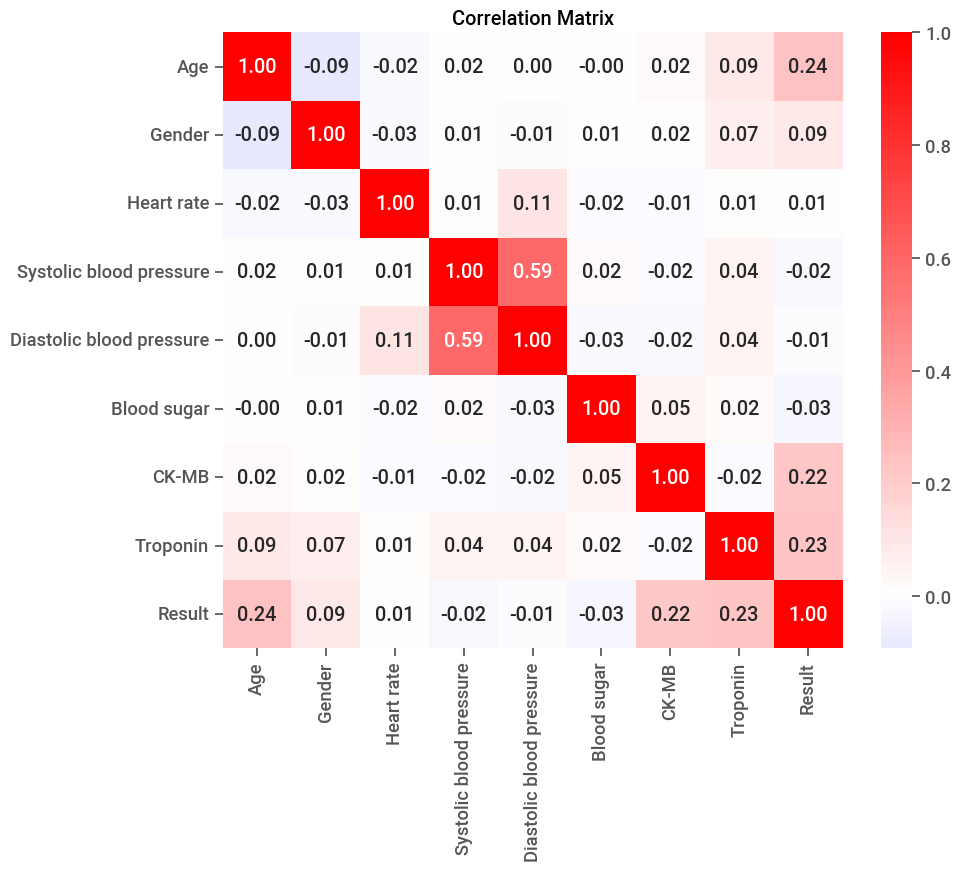

In [32]:
# Select only numerical features
numerical_features = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numerical_features.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="bwr", center=0)
plt.title("Correlation Matrix")
plt.show()


## Age

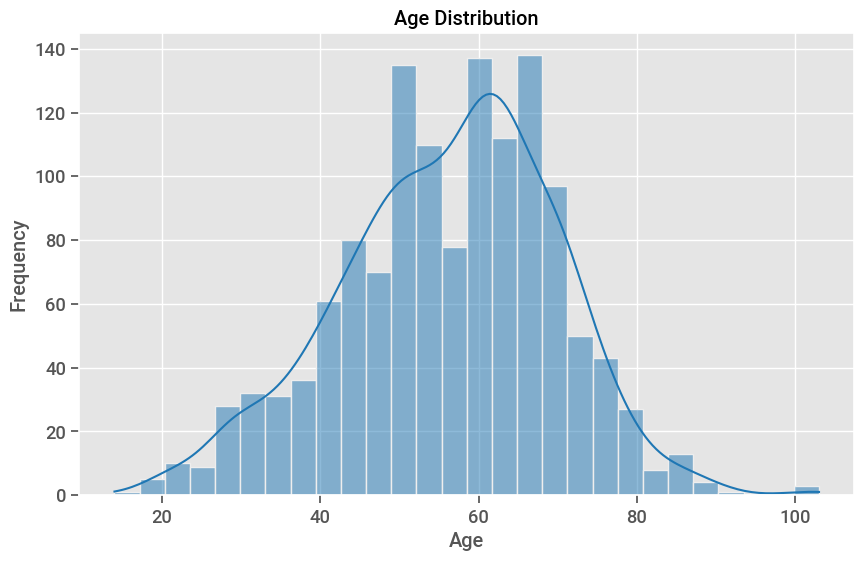

In [33]:
# Plot
sns.histplot(data=df, x="Age", kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


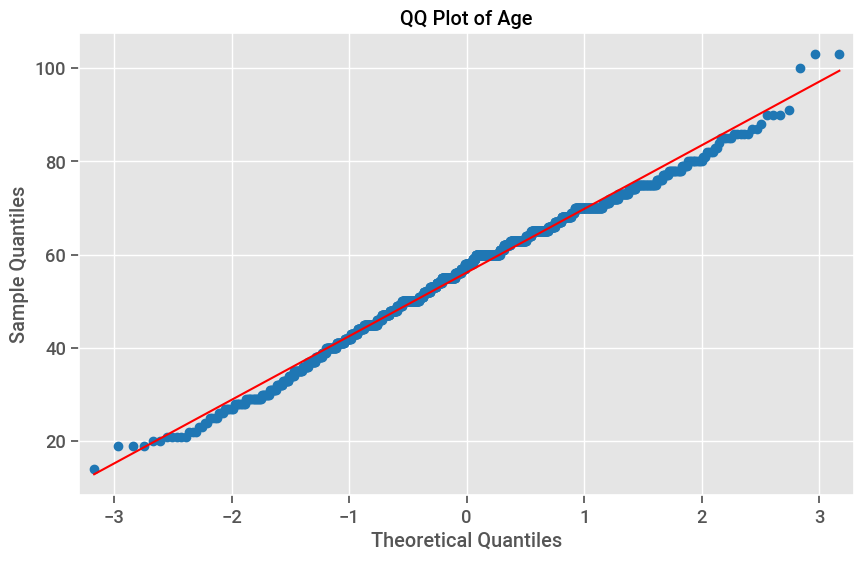

In [34]:
from statsmodels.graphics.gofplots import qqplot

qqplot(df['Age'], line='s')
plt.title("QQ Plot of Age")
plt.show()

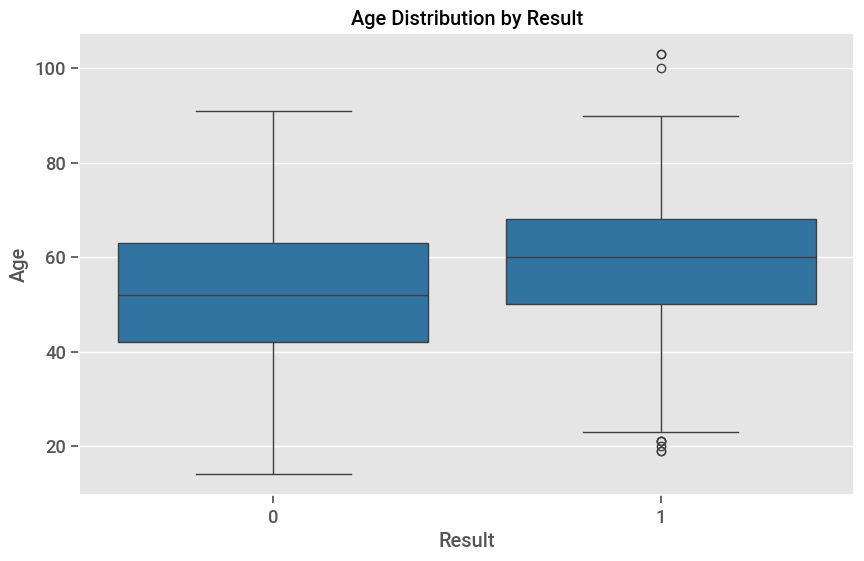

In [35]:
sns.boxplot(x="Result", y="Age", data=df)
plt.title("Age Distribution by Result")
plt.show()

### Is the average age of people with a heart attack significantly different from those without?


Age vs Heart Attack (t-test): t = 8.7793, p = 0.0000


/var/folders/pm/wnlkh7xd0gx096nr9129p76c0000gn/T/ipykernel_36856/810134261.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_temp, x='Diagnosis', y='Age',palette="coolwarm")


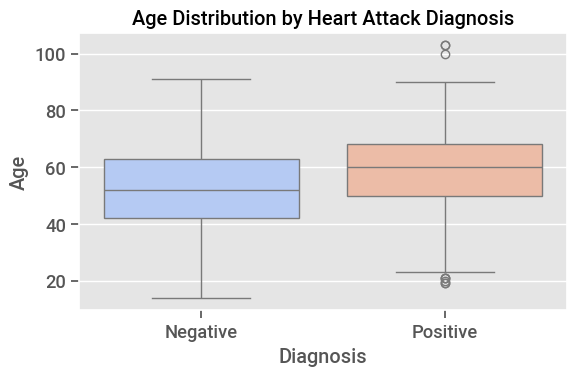

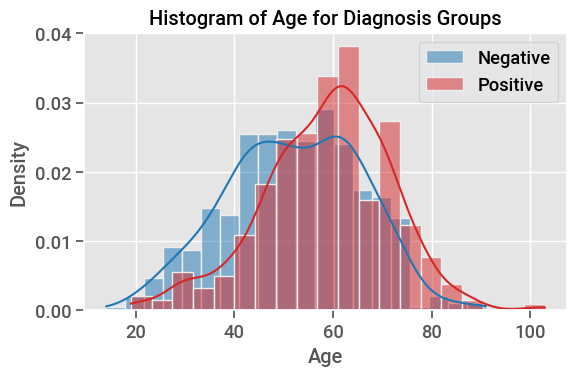

In [36]:
age_positive = df[df['Result'] == 1]['Age']
age_negative = df[df['Result'] == 0]['Age']

# T-test
t_stat, p_val = stats.ttest_ind(age_positive, age_negative, equal_var=False)

# Print test result
print(f"Age vs Heart Attack (t-test): t = {t_stat:.4f}, p = {p_val:.4f}")

# Violin Plot
plt.figure(figsize=(6, 4))
df_temp = df.copy()
df_temp['Diagnosis'] = df_temp['Result'].map({0: 'Negative', 1: 'Positive'})
sns.boxplot(data=df_temp, x='Diagnosis', y='Age',palette="coolwarm")
plt.title("Age Distribution by Heart Attack Diagnosis")
plt.tight_layout()
plt.show()

# Histogram Plot
plt.figure(figsize=(6, 4))
sns.histplot(age_negative, label='Negative', kde=True, stat='density', bins=20)
sns.histplot(age_positive, label='Positive', color='tab:red', kde=True, stat='density', bins=20)
plt.xlabel("Age")
plt.title("Histogram of Age for Diagnosis Groups")
plt.legend()
plt.tight_layout()
plt.show()

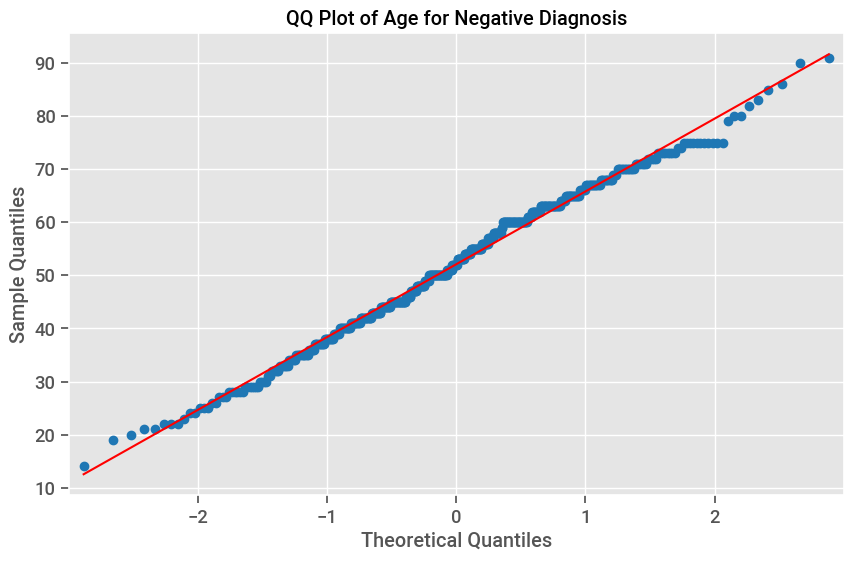

In [37]:
qqplot(age_negative, line='s')
plt.title("QQ Plot of Age for Negative Diagnosis")
plt.show()

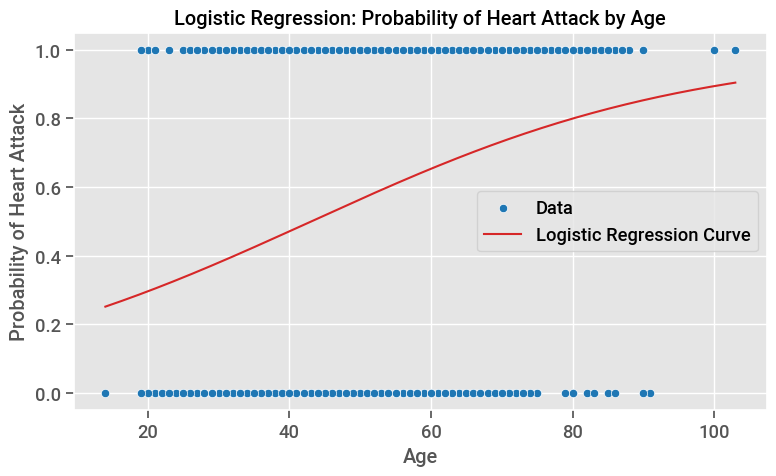

In [38]:
from sklearn.linear_model import LogisticRegression

# Prepare data
X = df[['Age']].values
y = df['Result'].values

# Instantiate and fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Plot the logistic regression curve
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Result', data=df, label='Data')

# Generate age values and predict probabilities
age_range = np.linspace(df['Age'].min(), df['Age'].max(), 300).reshape(-1, 1)
probabilities = log_reg.predict_proba(age_range)[:, 1]

# Plot the logistic regression curve
plt.plot(age_range, probabilities, color='tab:red', label='Logistic Regression Curve')
plt.xlabel('Age')
plt.ylabel('Probability of Heart Attack')
plt.title('Logistic Regression: Probability of Heart Attack by Age')
plt.legend()
plt.tight_layout()
plt.show()


## Heart Rate

In [39]:
df = df[df['Heart rate'] <= 200]  # Remove outliers for better visualization

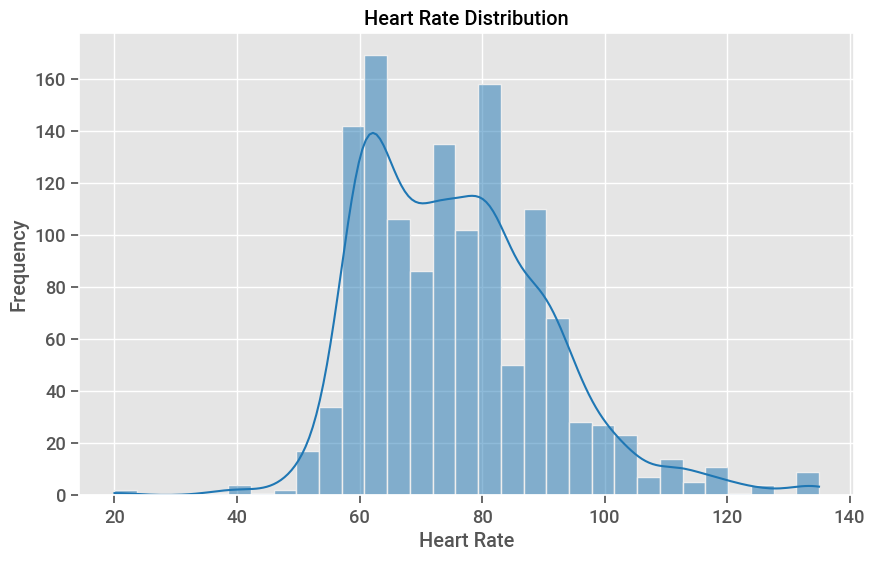

In [40]:
# Plot Heart Rate Distribution
sns.histplot(data=df, x="Heart rate", kde=True)
plt.title("Heart Rate Distribution")
plt.xlabel("Heart Rate")
plt.ylabel("Frequency")
plt.show()


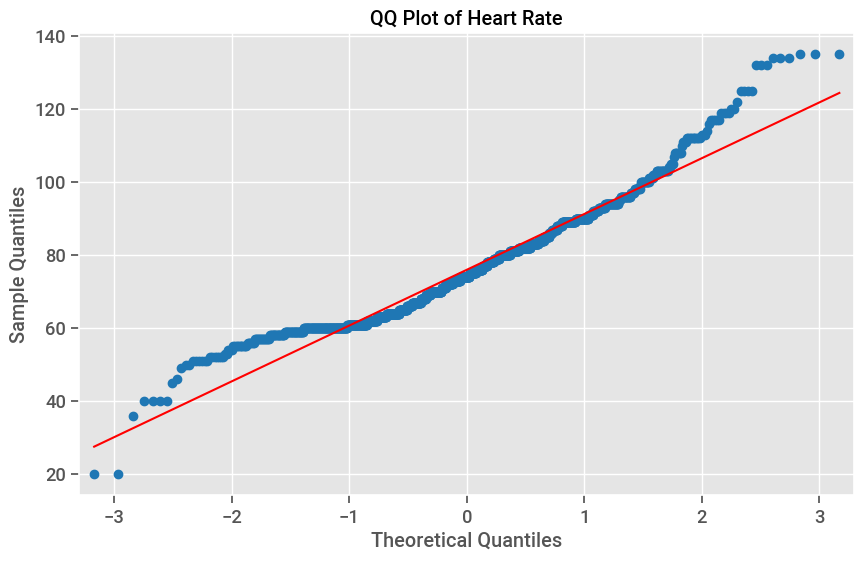

In [41]:
qqplot(df['Heart rate'], line='s')
plt.title("QQ Plot of Heart Rate")
plt.show()

Heart Rate Threshold = 75 bpm
Heart Attack Rate (≤ 75): 0.622  |  (> 75): 0.605
Z = -0.6611, one-sided p = 0.7457


/var/folders/pm/wnlkh7xd0gx096nr9129p76c0000gn/T/ipykernel_36856/4291589957.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=rates, palette="coolwarm")


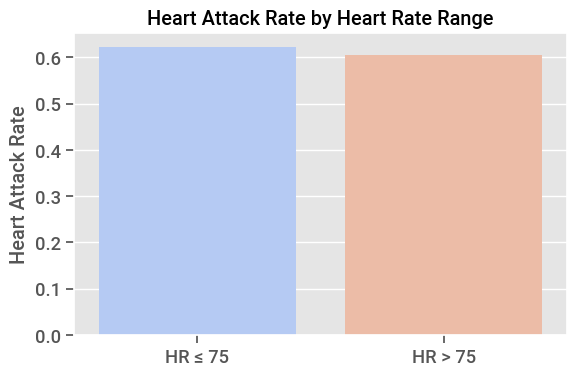

In [42]:
from scipy.stats import norm

# Choose heart rate threshold (e.g. 90 bpm)
threshold = 75

# Create groups
group_low = df[df['Heart rate'] <= threshold]
group_high = df[df['Heart rate'] > threshold]

# Count heart attack positives
x_low = (group_low['Result'] == 1).sum()
x_high = (group_high['Result'] == 1).sum()

n_low = group_low.shape[0]
n_high = group_high.shape[0]

# Proportions
p1 = x_low / n_low
p2 = x_high / n_high
p_pool = (x_low + x_high) / (n_low + n_high)

# Standard error
se = np.sqrt(p_pool * (1 - p_pool) * (1/n_low + 1/n_high))

# Z-score and one-sided p-value
z_score = (p2 - p1) / se
p_val = 1 - norm.cdf(z_score)

# Print result
print(f"Heart Rate Threshold = {threshold} bpm")
print(f"Heart Attack Rate (≤ {threshold}): {p1:.3f}  |  (> {threshold}): {p2:.3f}")
print(f"Z = {z_score:.4f}, one-sided p = {p_val:.4f}")

# Plot
plt.figure(figsize=(6, 4))
rates = [p1, p2]
labels = [f"HR ≤ {threshold}", f"HR > {threshold}"]
sns.barplot(x=labels, y=rates, palette="coolwarm")
plt.ylabel("Heart Attack Rate")
plt.title("Heart Attack Rate by Heart Rate Range")
plt.tight_layout()
plt.show()

Heart Rate vs Heart Attack (t-test): t = 0.2478, p = 0.8044


/var/folders/pm/wnlkh7xd0gx096nr9129p76c0000gn/T/ipykernel_36856/3038159528.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_temp, x='Diagnosis', y='Heart rate', palette='coolwarm')


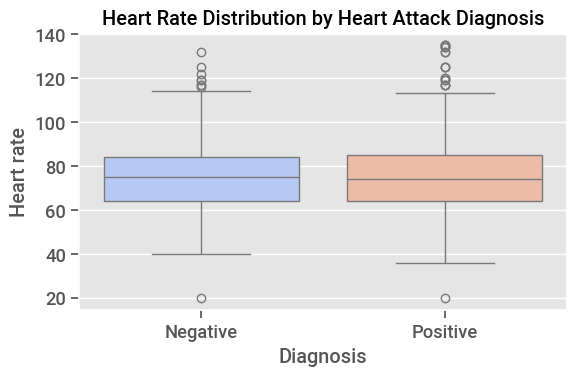

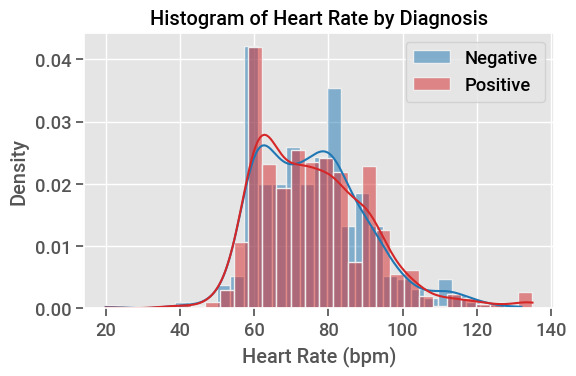

In [43]:
# Split heart rate by diagnosis result
hr_positive = df[df['Result'] == 1]['Heart rate']
hr_negative = df[df['Result'] == 0]['Heart rate']

# Two-sample t-test
t_stat_hr, p_val_hr = stats.ttest_ind(hr_positive, hr_negative, equal_var=False)

# Print result
print(f"Heart Rate vs Heart Attack (t-test): t = {t_stat_hr:.4f}, p = {p_val_hr:.4f}")

# Violin Plot
plt.figure(figsize=(6, 4))
df_temp = df.copy()
df_temp['Diagnosis'] = df_temp['Result'].map({0: 'Negative', 1: 'Positive'})
sns.boxplot(data=df_temp, x='Diagnosis', y='Heart rate', palette='coolwarm')
plt.title("Heart Rate Distribution by Heart Attack Diagnosis")
plt.tight_layout()
plt.show()

# Histogram Plot
plt.figure(figsize=(6, 4))
sns.histplot(hr_negative, label='Negative', color='tab:blue', kde=True, stat='density', bins=30)
sns.histplot(hr_positive, label='Positive', color='tab:red', kde=True, stat='density', bins=30)
plt.xlabel("Heart Rate (bpm)")
plt.title("Histogram of Heart Rate by Diagnosis")
plt.legend()
plt.tight_layout()
plt.show()

## Troponin

In [44]:
df[df['Troponin'] > 4].count()

Age                         23
Gender                      23
Heart rate                  23
Systolic blood pressure     23
Diastolic blood pressure    23
Blood sugar                 23
CK-MB                       23
Troponin                    23
Result                      23
dtype: int64

In [45]:
df = df[df['Troponin'] <= 4]  # Remove outliers for better visualization

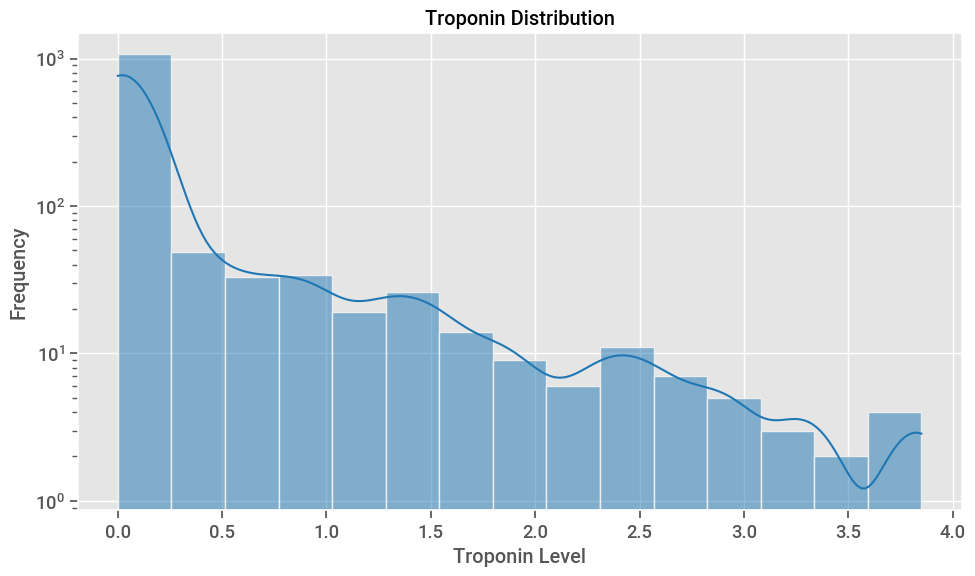

In [46]:
# Plot Troponin Distribution
sns.histplot(data=df, x="Troponin", kde=True, bins=15, color="tab:blue")
plt.title("Troponin Distribution")
plt.xlabel("Troponin Level")
plt.ylabel("Frequency")
plt.yscale('log')  # Log scale for better visibility
plt.tight_layout()
plt.show()

### Is Troponin alone is a good seperator?

In [47]:
from scipy.stats import norm
import numpy as np

# Get troponin samples
troponin_pos = df[df['Result'] == 1]['Troponin']
troponin_neg = df[df['Result'] == 0]['Troponin']

# Estimate distributions under H0 and H1
mu_0, sigma_0 = troponin_neg.mean(), troponin_neg.std()
mu_1, sigma_1 = troponin_pos.mean(), troponin_pos.std()

# Define log-likelihood ratio function to avoid underflow
def log_likelihood_ratio(x):
    log_f1 = norm.logpdf(x, mu_1, sigma_1)
    log_f0 = norm.logpdf(x, mu_0, sigma_0)
    return log_f1 - log_f0

# Evaluate log L(x) on full dataset
df['log_LR'] = log_likelihood_ratio(df['Troponin'])

# Choose a rejection threshold for log LR (e.g. at alpha = 0.05)
# Sort log LRs for negatives to find critical value
alpha = 0.05
neg_log_lrs = df[df['Result'] == 0]['log_LR']
log_lr_thresh = np.quantile(neg_log_lrs, 1 - alpha)

# Apply test
df['Reject_H0'] = df['log_LR'] > log_lr_thresh

# Compute empirical TPR and FPR
TPR = (df['Reject_H0'] & (df['Result'] == 1)).mean()
FPR = (df['Reject_H0'] & (df['Result'] == 0)).mean()

print(f"Neyman-Pearson Likelihood Ratio Test (Troponin):")
print(f"Critical value (at alpha={alpha}): log LR > {log_lr_thresh:.4f}")
print(f"TPR (power) = {TPR:.3f}, FPR = {FPR:.3f}")

Neyman-Pearson Likelihood Ratio Test (Troponin):
Critical value (at alpha=0.05): log LR > -3.7030
TPR (power) = 0.483, FPR = 0.019


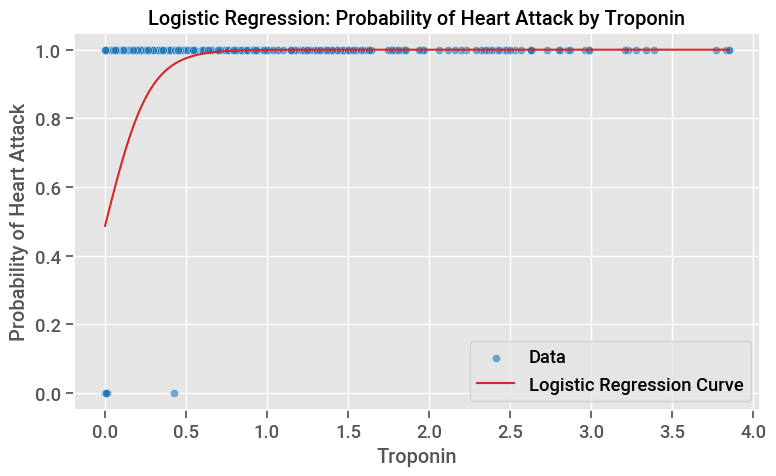

In [48]:
# Prepare data
X_troponin = df[['Troponin']].values
y_result = df['Result'].values

# Instantiate and fit the logistic regression model
log_reg_troponin = LogisticRegression()
log_reg_troponin.fit(X_troponin, y_result)

# Generate troponin values and predict probabilities
troponin_range = np.linspace(df['Troponin'].min(), df['Troponin'].max(), 300).reshape(-1, 1)
probabilities_troponin = log_reg_troponin.predict_proba(troponin_range)[:, 1]

# Plot the logistic regression curve
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Troponin', y='Result', data=df, label='Data', alpha=0.6)

plt.plot(troponin_range, probabilities_troponin, color='tab:red', label='Logistic Regression Curve')
plt.xlabel('Troponin')
plt.ylabel('Probability of Heart Attack')
plt.title('Logistic Regression: Probability of Heart Attack by Troponin')
plt.legend()
plt.tight_layout()
plt.show()

## Gender

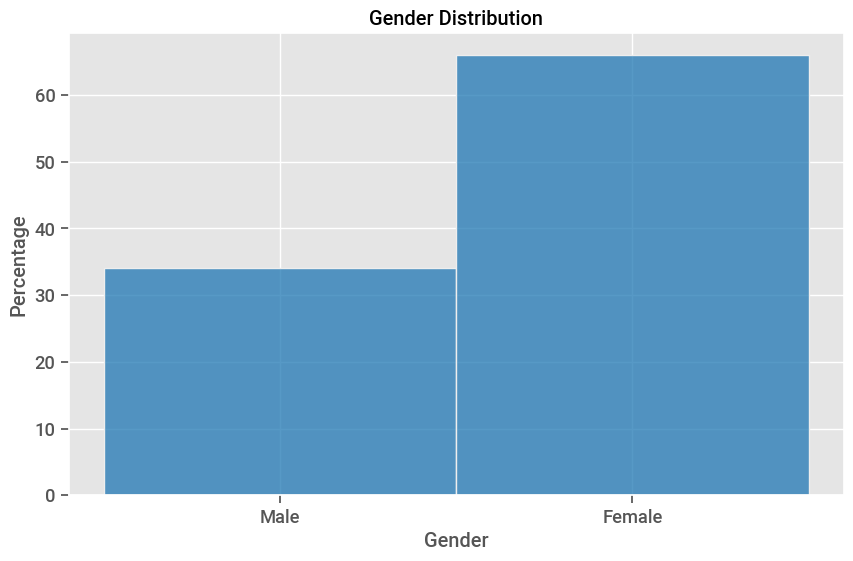

In [59]:
sns.histplot(data=df, x="Gender", discrete=True, stat="percent")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.xticks([0, 1], ["Male", "Female"])
# plt.tight_layout()
plt.show()

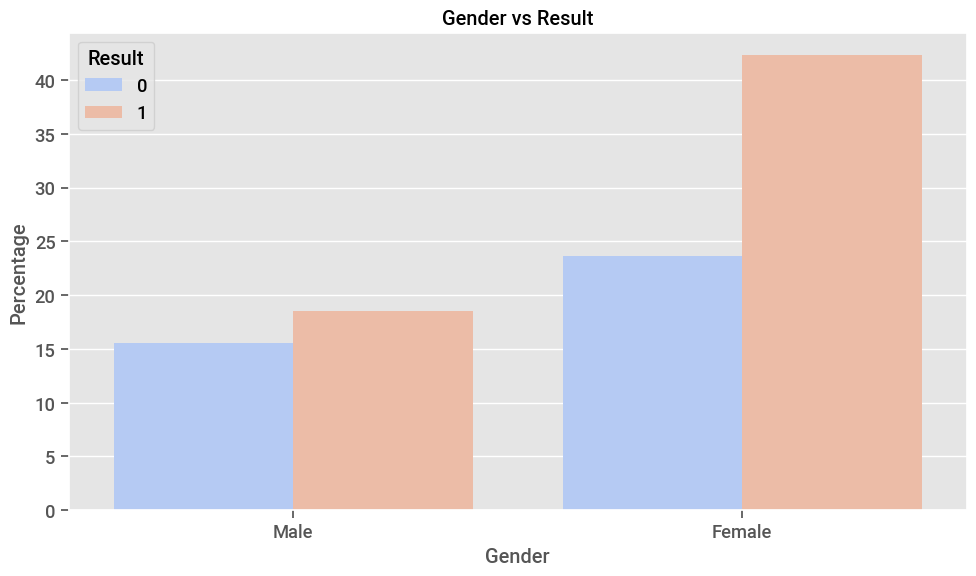

In [63]:
sns.countplot(data=df, x="Gender", hue="Result", palette="coolwarm", stat="percent")
plt.title("Gender vs Result")
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.xticks([0, 1], ["Male", "Female"])
plt.tight_layout()
plt.show()

## CK-MB

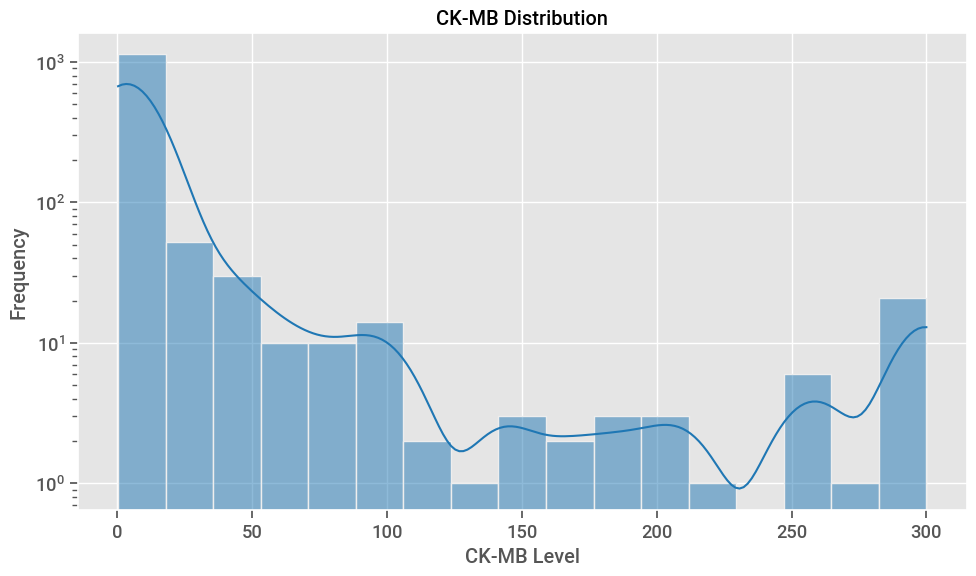

In [70]:
sns.histplot(data=df, x="CK-MB", kde=True, bins=17, color="tab:blue")
plt.title("CK-MB Distribution")
plt.xlabel("CK-MB Level")
plt.ylabel("Frequency")
plt.yscale('log')  # Log scale for better visibility
plt.tight_layout()
plt.show()

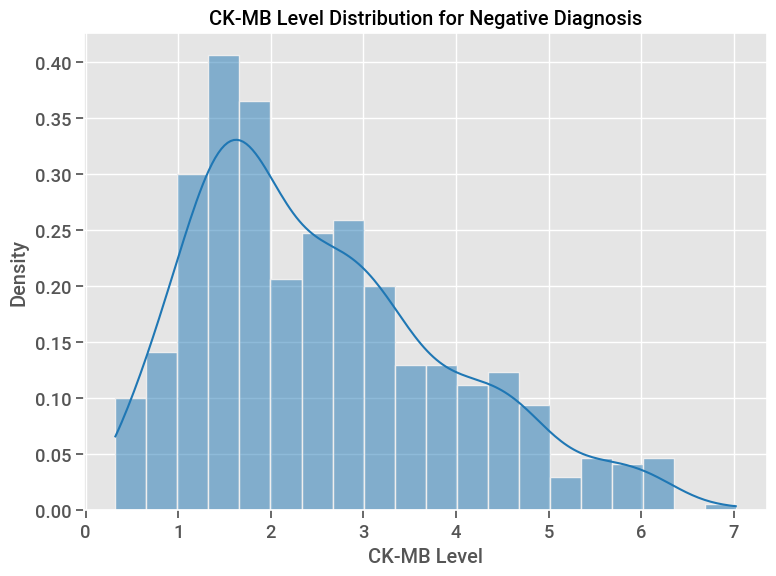

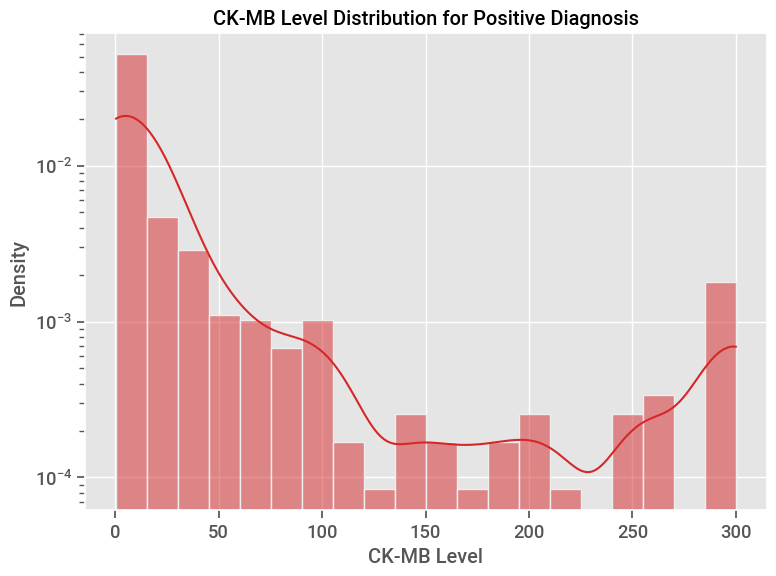

In [75]:
ckmb_positive = df[df['Result'] == 1]['CK-MB']
ckmb_negative = df[df['Result'] == 0]['CK-MB']

# Plot CK-MB levels for negative results
plt.figure(figsize=(8, 6))
sns.histplot(ckmb_negative, color='tab:blue', kde=True, stat='density', bins=20)
plt.title("CK-MB Level Distribution for Negative Diagnosis")
plt.xlabel("CK-MB Level")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

# Plot CK-MB levels for positive results
plt.figure(figsize=(8, 6))
sns.histplot(ckmb_positive, color='tab:red', kde=True, stat='density', bins=20)
plt.yscale('log')  # Log scale for better visibility
plt.title("CK-MB Level Distribution for Positive Diagnosis")
plt.xlabel("CK-MB Level")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

In [78]:
df.drop(columns=['log_LR', 'Reject_H0'], inplace=True, errors='ignore')

## Check Feature Importence

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Result']), df['Result'], test_size=0.4, random_state=42)


In [94]:
X_train.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
1278,49,1,70,149,79,104.0,2.930,0.023
609,74,1,63,103,61,130.0,2.400,0.026
476,70,1,87,141,81,106.0,0.929,1.150
625,42,1,89,111,52,106.0,6.480,0.003
1126,103,0,56,171,56,150.0,51.960,0.044


In [87]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       195
           1       0.98      0.99      0.99       323

    accuracy                           0.98       518
   macro avg       0.98      0.98      0.98       518
weighted avg       0.98      0.98      0.98       518

Accuracy: 0.9826254826254827


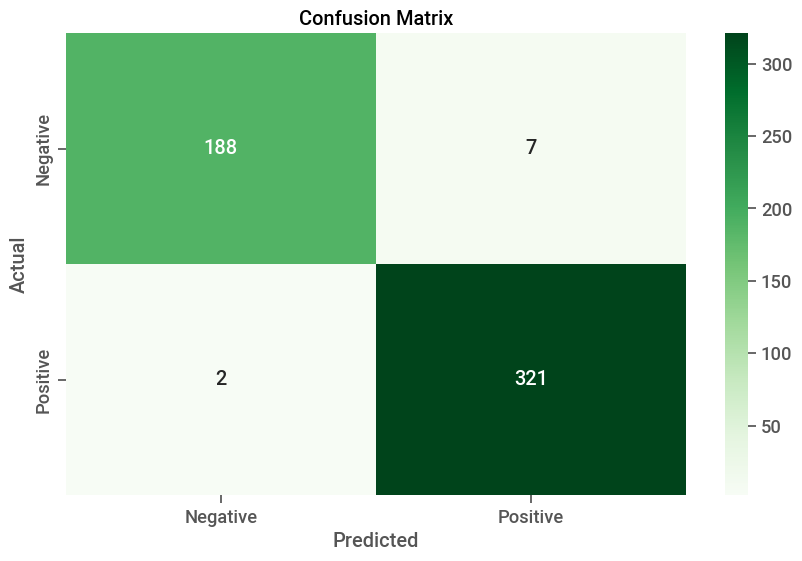

In [93]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Greens", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

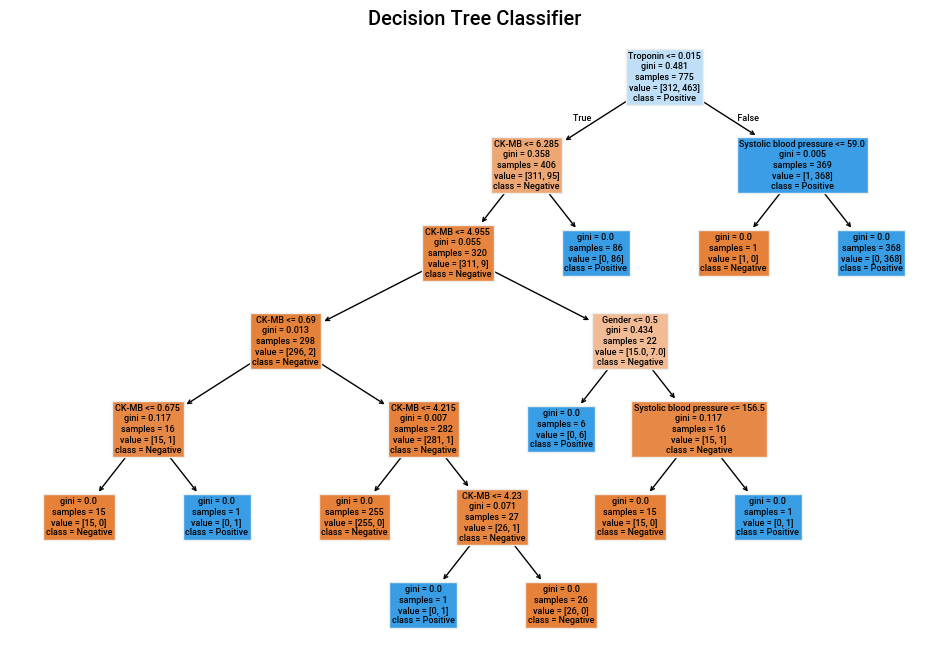

In [89]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=df.drop(columns=['Result']).columns, class_names=['Negative', 'Positive'], filled=True)
plt.title("Decision Tree Classifier")
plt.show()